In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
timestamp = '2018-01-15 3:45pm'

In [3]:
pd.to_datetime(timestamp)

Timestamp('2018-01-15 15:45:00')

In [4]:
date = '03/04/2019'

In [5]:
pd.to_datetime(date, dayfirst=True)

Timestamp('2019-04-03 00:00:00')

In [6]:
dates = ['07-04-2014', '08-04-2014','07-04-2015', '08-04-2015']
prices = [125, 372, 94, 537]
dateslist = list(zip(dates, prices))

df = pd.DataFrame(data=dateslist, columns=['date', 'prices'])
df

,date,prices
0,07-04-2014,125
1,08-04-2014,372
2,07-04-2015,94
3,08-04-2015,537


In [7]:
df.dtypes

date      object
prices     int64
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%Y')

In [9]:
df.dtypes

date      datetime64[ns]
prices             int64
dtype: object

In [10]:
df

,date,prices
0,2014-07-04,125
1,2014-08-04,372
2,2015-07-04,94
3,2015-08-04,537


In [11]:
df['month'] = df['date'].dt.month_name()
df

,date,prices,month
0,2014-07-04,125,July
1,2014-08-04,372,August
2,2015-07-04,94,July
3,2015-08-04,537,August


In [12]:
df['weekday'] = df['date'].dt.day_name()
df

,date,prices,month,weekday
0,2014-07-04,125,July,Friday
1,2014-08-04,372,August,Monday
2,2015-07-04,94,July,Saturday
3,2015-08-04,537,August,Tuesday


In [14]:
df = pd.read_csv('traffic_2019.csv', index_col="Date", parse_dates=True)
df.head()

,Date Of Stop,Time Of Stop,Latitude,Longitude
Date,,,,
2019-07-30 22:15:00,7/30/2019,22:15:00,38.990102,-77.151645
2019-07-07 22:54:00,7/7/2019,22:54:00,39.040360,-77.051137
2019-07-10 16:00:00,7/10/2019,16:00:00,0.000000,0.000000
2019-08-15 22:42:00,8/15/2019,22:42:00,38.997645,-77.096600
2019-04-15 05:49:00,4/15/2019,5:49:00,0.000000,0.000000


In [15]:

#make dates the index
#format dates as we load the data
df= df.drop(["Date Of Stop","Time Of Stop"],axis=1)

In [16]:
df.head()

,Latitude,Longitude
Date,,
2019-07-30 22:15:00,38.990102,-77.151645
2019-07-07 22:54:00,39.040360,-77.051137
2019-07-10 16:00:00,0.000000,0.000000
2019-08-15 22:42:00,38.997645,-77.096600
2019-04-15 05:49:00,0.000000,0.000000


In [17]:
df.describe()

,Latitude,Longitude
count,188589.000000,188589.000000
mean,36.626630,-72.276967
std,9.478230,18.703562
min,0.000000,-77.901133
25%,39.013263,-77.189402
50%,39.058392,-77.097133
75%,39.129660,-77.031830
max,39.544888,0.016667


In [18]:
#rename columns with shorter name
#create a new column 'Total' with combined values of latitude and longitude columns

df.columns = ['Latitude', 'Longitude']
df['Total'] = df.eval('Latitude + Longitude')


In [19]:
df.head()

,Latitude,Longitude,Total
Date,,,
2019-07-30 22:15:00,38.990102,-77.151645,-38.161543
2019-07-07 22:54:00,39.040360,-77.051137,-38.010777
2019-07-10 16:00:00,0.000000,0.000000,0.000000
2019-08-15 22:42:00,38.997645,-77.096600,-38.098955
2019-04-15 05:49:00,0.000000,0.000000,0.000000


Text(0, 0.5, 'Hourly Violation Count')

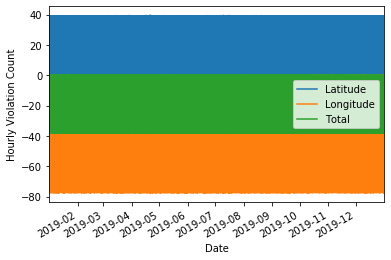

In [20]:
#bar plot of data
df.plot()
plt.ylabel('Hourly Violation Count')

In [32]:
#hourly intervals are too narrow to make sense of data
#aggregate as weekly data instead
weekly = df.resample('W').sum()
weekly.head()

,Latitude,Longitude,Total
Date,,,
2019-01-06,140025.667558,-276299.195427,-136273.527869
2019-01-13,139200.976916,-274632.764454,-135431.787538
2019-01-20,107573.040338,-212233.069735,-104660.029397
2019-01-27,151038.963809,-298012.451349,-146973.487540
2019-02-03,117162.297013,-231204.148611,-114041.851598


In [33]:
weekly = df.resample('W').sum()
weekly.head()

,Latitude,Longitude,Total
Date,,,
2019-01-06,140025.667558,-276299.195427,-136273.527869
2019-01-13,139200.976916,-274632.764454,-135431.787538
2019-01-20,107573.040338,-212233.069735,-104660.029397
2019-01-27,151038.963809,-298012.451349,-146973.487540
2019-02-03,117162.297013,-231204.148611,-114041.851598


Text(0, 0.5, 'Weekly Violation Count')

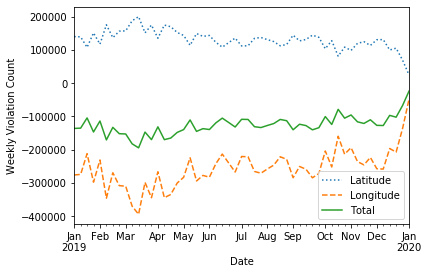

In [43]:
# plot data by week
weekly.plot(style=[':', '--', '-']) #line styles for each feature
plt.ylabel('Weekly Violation Count')

In [35]:
#see what an average day looks like
by_time = df.groupby(df.index.time).mean()
by_time

,Latitude,Longitude,Total
00:00:00,37.697043,-74.398025,-36.700982
00:01:00,34.880927,-68.796967,-33.916041
00:02:00,36.500705,-72.042123,-35.541418
00:03:00,37.377259,-73.761154,-36.383895
00:04:00,35.514179,-70.104501,-34.590322
...,...,...,...
23:55:00,38.093464,-75.169542,-37.076079
23:56:00,37.202817,-73.412587,-36.209769
23:57:00,36.722165,-72.455135,-35.732969
23:58:00,37.332562,-73.680217,-36.347655


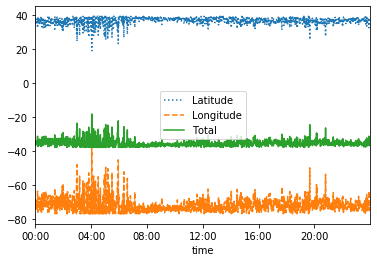

In [36]:
# create less cluttered tick markers for graph
hourly_ticks = 4*60*60*np.arange(6) #6 intervals of 4 hours
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])

In [37]:
#What does traffic usage look like by day of the week?
by_weekday = df.groupby(df.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

by_weekday

,Latitude,Longitude,Total
Mon,36.732337,-72.486479,-35.754142
Tue,36.974017,-72.969866,-35.995849
Wed,36.865267,-72.745140,-35.879873
Thur,36.499581,-72.025802,-35.526222
Fri,36.404618,-71.835379,-35.430761
Sat,36.387325,-71.801003,-35.413677
Sun,36.191397,-71.416527,-35.225130


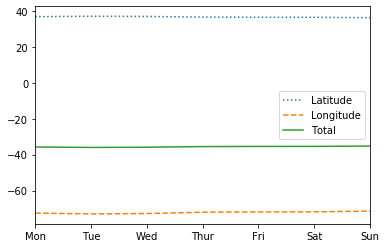

In [38]:
by_weekday.plot(style=[':','--','-'])

In [39]:
#set conditions to show hourly trend on weekdays vs weekends
weekend = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')
weekend

array(['Weekday', 'Weekend', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekend'], dtype='<U7')

In [41]:
by_weektime = df.groupby([weekend, df.index.time]).mean()
by_weektime

Latitude  Longitude      Total
Weekday 00:00:00  37.642910 -74.297866 -36.654956
        00:01:00  35.227014 -69.513384 -34.286370
        00:02:00  35.019241 -69.116715 -34.097474
        00:03:00  38.535382 -76.034070 -37.498688
        00:04:00  36.246928 -71.555230 -35.308302
...                     ...        ...        ...
Weekend 23:55:00  37.697189 -74.373774 -36.676585
        23:56:00  38.189970 -75.391929 -37.201959
        23:57:00  35.533773 -70.101393 -34.567620
        23:58:00  38.009671 -75.034620 -37.024949
        23:59:00  39.042094 -77.061691 -38.019596

[2873 rows x 3 columns]

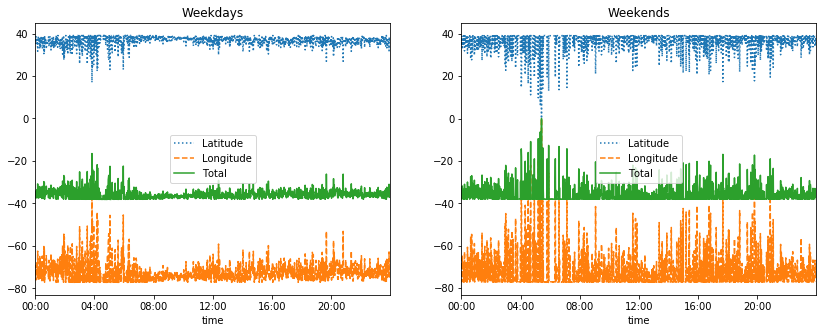

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_weektime.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])

by_weektime.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-'])